In [83]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [85]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [86]:
print(coordinates)

[(40.1533683972288, -69.23364549966811), (-70.60292037095287, -50.98790637294056), (31.77109643238245, -64.21422198513118), (13.661028344294763, -13.206328457637795), (-72.60373514051068, 119.96208903353573), (-60.648272011709395, 136.23155893067138), (-25.54134034568841, -95.7309282087794), (88.15929501970217, 15.105202449888367), (84.68201038699215, -162.1090383825274), (37.123404149472776, 143.9238066101633), (-85.10943032026418, 169.80464142728601), (64.64960355413231, -179.7680453373475), (58.18555738592863, 43.23552957756223), (-8.483586938657794, 119.56524501715495), (-87.28585440609672, 95.74764198829826), (33.58901267018193, 166.44807901975355), (-76.43573540117376, -98.79081997553115), (-50.868460121358424, -48.13454080766351), (38.150349709547754, 60.40455625677876), (7.660756225958011, -16.93269228657323), (-61.76170483051163, 168.3547821670461), (72.41189794872028, -96.55502115453342), (-77.26562369597453, 32.01969057605308), (-73.91855391231672, -10.941265189923286), (0.5

In [87]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [88]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

578

In [89]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [90]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [91]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [92]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nantucket
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | tambacounda
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | ishinomaki
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | egvekinot
Processing Record 13 of Set 1 | antropovo
Processing Record 14 of Set 1 | bima
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | kaka
City not found. Skipping...
Processing Record 19 of Set 1 | conakry
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | cape tow

Processing Record 36 of Set 4 | morros
Processing Record 37 of Set 4 | beringovskiy
Processing Record 38 of Set 4 | arraial do cabo
Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | caconda
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | akureyri
Processing Record 43 of Set 4 | daru
Processing Record 44 of Set 4 | mizpe ramon
City not found. Skipping...
Processing Record 45 of Set 4 | dasoguz
Processing Record 46 of Set 4 | vanavara
Processing Record 47 of Set 4 | durant
Processing Record 48 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 4 | folldal
Processing Record 50 of Set 4 | oranjemund
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | moen
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | samarai
Processing Record 6 of Set 5 | alpoyeca
Processing Record 7 of Set 5 | raudeberg
Processing Record 8 

Processing Record 22 of Set 8 | chapais
Processing Record 23 of Set 8 | camabatela
Processing Record 24 of Set 8 | biscarrosse
Processing Record 25 of Set 8 | port augusta
Processing Record 26 of Set 8 | amursk
Processing Record 27 of Set 8 | ostrovnoy
Processing Record 28 of Set 8 | manyana
Processing Record 29 of Set 8 | maan
Processing Record 30 of Set 8 | saint-augustin
Processing Record 31 of Set 8 | pafos
Processing Record 32 of Set 8 | porto walter
Processing Record 33 of Set 8 | shubarshi
Processing Record 34 of Set 8 | kot addu
Processing Record 35 of Set 8 | amderma
City not found. Skipping...
Processing Record 36 of Set 8 | pila
Processing Record 37 of Set 8 | saint-pierre
Processing Record 38 of Set 8 | myitkyina
Processing Record 39 of Set 8 | almaznyy
Processing Record 40 of Set 8 | avera
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | mogadishu
Processing Record 44 of Set 8 | katsuura
Processing Record 4

Processing Record 15 of Set 12 | batagay
Processing Record 16 of Set 12 | kattivakkam
Processing Record 17 of Set 12 | altay
Processing Record 18 of Set 12 | broken hill
Processing Record 19 of Set 12 | maragogi
Processing Record 20 of Set 12 | shaunavon
Processing Record 21 of Set 12 | ravar
Processing Record 22 of Set 12 | polikhronon
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | adrar
Processing Record 25 of Set 12 | kieta
Processing Record 26 of Set 12 | shingu
Processing Record 27 of Set 12 | geraldton
Processing Record 28 of Set 12 | sokolo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [93]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nantucket,41.2835,-70.0995,43.97,49,1,8.05,US,2021-12-13 00:08:08
1,Ushuaia,-54.8000,-68.3000,40.06,73,55,10.36,AR,2021-12-13 00:08:08
2,Saint George,37.1041,-113.5841,54.07,39,1,1.99,US,2021-12-13 00:07:21
3,Tambacounda,13.7539,-13.7586,80.67,14,45,5.57,SN,2021-12-13 00:08:09
4,Albany,42.6001,-73.9662,40.57,49,0,9.04,US,2021-12-13 00:05:38
5,New Norfolk,-42.7826,147.0587,67.91,45,9,4.00,AU,2021-12-13 00:08:09
6,Pisco,-13.7000,-76.2167,66.25,88,20,14.97,PE,2021-12-13 00:04:55
7,Longyearbyen,78.2186,15.6401,31.84,80,75,19.57,SJ,2021-12-13 00:07:13
8,Barrow,71.2906,-156.7887,-12.98,70,1,12.66,US,2021-12-13 00:08:10
9,Ishinomaki,38.4167,141.3000,39.29,68,42,32.91,JP,2021-12-13 00:08:10


In [62]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [64]:
city_data_df = city_data_df[new_column_order]

In [65]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bridlington,GB,2021-12-12 22:54:03,54.0831,-0.1919,53.78,76,77,21.74
1,Sabzevar,IR,2021-12-12 22:54:03,36.2126,57.6819,40.10,65,2,3.51
2,Busselton,AU,2021-12-12 22:54:03,-33.6500,115.3333,51.08,60,100,8.81
3,Mahebourg,MU,2021-12-12 22:54:04,-20.4081,57.7000,75.49,88,75,17.27
4,Punta Arenas,CL,2021-12-12 22:51:08,-53.1500,-70.9167,50.11,34,0,23.02
5,Great Bend,US,2021-12-12 22:54:04,38.3645,-98.7648,55.92,26,1,5.01
6,Amga,RU,2021-12-12 22:54:05,60.8953,131.9608,-18.65,98,100,2.19
7,Albany,US,2021-12-12 22:54:05,42.6001,-73.9662,40.80,44,0,9.08
8,Sunndalsora,NO,2021-12-12 22:54:06,62.6754,8.5515,37.45,82,95,11.36
9,Lavrentiya,RU,2021-12-12 22:54:06,65.5833,-171.0000,-14.46,88,16,3.27


In [66]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [67]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

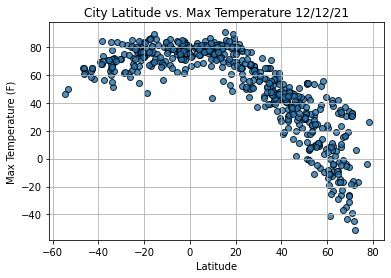

In [68]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

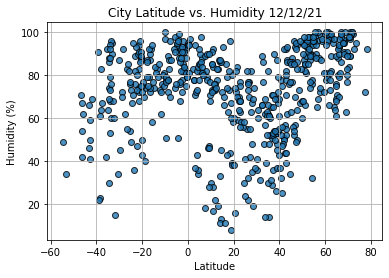

In [69]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

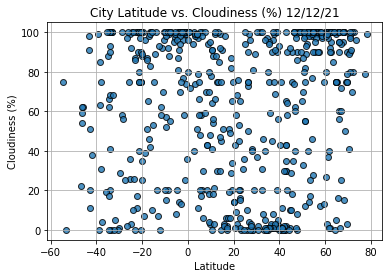

In [70]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

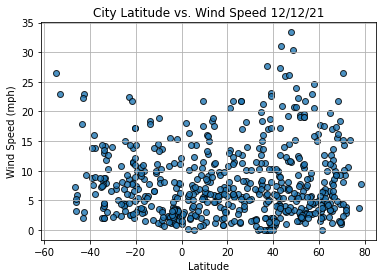

In [71]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
index13 = city_data_df.loc[13]
index13

City                        Airai
Country                        TL
Date          2021-12-12 22:54:08
Lat                       -8.9266
Lng                      125.4092
Max Temp                    66.88
Humidity                       78
Cloudiness                    100
Wind Speed                   1.05
Name: 13, dtype: object

In [75]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
562     True
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [76]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bridlington,GB,2021-12-12 22:54:03,54.0831,-0.1919,53.78,76,77,21.74
1,Sabzevar,IR,2021-12-12 22:54:03,36.2126,57.6819,40.10,65,2,3.51
5,Great Bend,US,2021-12-12 22:54:04,38.3645,-98.7648,55.92,26,1,5.01
6,Amga,RU,2021-12-12 22:54:05,60.8953,131.9608,-18.65,98,100,2.19
7,Albany,US,2021-12-12 22:54:05,42.6001,-73.9662,40.80,44,0,9.08


In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

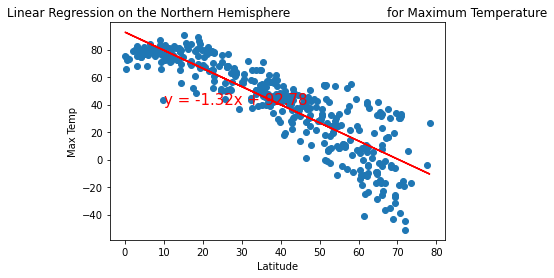

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (Temp/ipykernel_12304/518375573.py, line 6)